### Possums

<center>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Trichosurus_vulpecula_1.jpg/440px-Trichosurus_vulpecula_1.jpg' width = 30%/>
</center>



*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -- from Wikipedia.

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.discrete.discrete_model import Logit

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('data/possum.csv').dropna()

In [42]:
df.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


In [43]:
df['pop'].value_counts()

other    58
Vic      44
Name: pop, dtype: int64

In [44]:
df['site'].value_counts()

1    33
7    18
6    13
5    13
2    11
4     7
3     7
Name: site, dtype: int64

### Task

1. Examine distributions for outliers, remove any you believe should be.
2. Build Logistic Regression model to predict `pop`; region of origin.  Make sure to include a model on all the features, and examine the coefficients.
3. Rerun a model without the head variable, did any of the coefficients change?  Why do you think this is?

In [58]:
X = df.drop(['pop', 'site'], axis = 1)
y = df['pop']

X['sex'] = np.where(X['sex'] == 'm', 0, 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

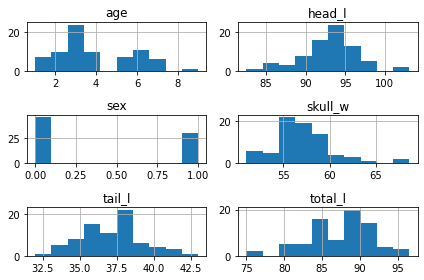

In [60]:
X_train.hist();
plt.tight_layout();

In [61]:
lgr = LogisticRegression().fit(X_train, y_train)

In [62]:
lgr.score(X_train, y_train)

0.9078947368421053

In [63]:
lgr.score(X_test, y_test)

0.7692307692307693

In [64]:
pd.DataFrame(lgr.coef_, columns=X_train.columns)

,sex,age,head_l,skull_w,total_l,tail_l
0,-0.720043,0.050793,0.091352,0.162818,-0.644436,1.78989


In [65]:
X2 = X.drop('skull_w', axis = 1)

In [66]:
X2_train, X2_test = train_test_split(X2, random_state = 42)

In [67]:
lgr2 = LogisticRegression().fit(X2_train, y_train)

In [68]:
lgr2.score(X2_train, y_train)

0.9078947368421053

In [69]:
lgr2.score(X2_test, y_test)

0.8076923076923077

In [71]:
pd.DataFrame(lgr.coef_, columns=X_train.columns)

,sex,age,head_l,skull_w,total_l,tail_l
0,-0.720043,0.050793,0.091352,0.162818,-0.644436,1.78989


In [70]:
pd.DataFrame(lgr2.coef_, columns=X2_train.columns)

,sex,age,head_l,total_l,tail_l
0,-0.730061,0.041123,0.171797,-0.603751,1.694601


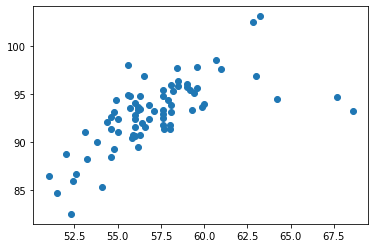

In [72]:
plt.scatter(X_train['skull_w'], X_train['head_l'])